# Food Insecurity in the US
This notebook contains exploratory data analysis for Food Insecurity in the US based on the dataset obtained from https://www.ers.usda.gov/data-products/food-environment-atlas/data-access-and-documentation-downloads/

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
FoodAtlas_Variable_List = pd.read_excel("../FoodEnvironmentAtlas.xls", sheet_name=' Variable_List')
FoodAtlas_Variable_List.head()

,Category Name,Category Code,Subcategory Name,Variable Name,Variable Code,Geography,Units
0,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store, 2010",LACCESS_POP10,CNTY10,Count
1,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store, 2015",LACCESS_POP15,CNTY10,Count
2,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (% change), 20...",PCH_LACCESS_POP_10_15,CNTY10,% change
3,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (%), 2010",PCT_LACCESS_POP10,CNTY10,Percent
4,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (%), 2015",PCT_LACCESS_POP15,CNTY10,Percent


In [5]:
FoodAtlas_Insecurity = pd.read_excel("../FoodEnvironmentAtlas.xls", sheet_name='INSECURITY')
FoodAtlas_Insecurity 

,FIPS,State,County,FOODINSEC_12_14,FOODINSEC_15_17,CH_FOODINSEC_14_17,VLFOODSEC_12_14,VLFOODSEC_15_17,CH_VLFOODSEC_14_17
0,1001,AL,Autauga,16.8,16.3,-0.5,7.2,7.1,-0.1
1,1003,AL,Baldwin,16.8,16.3,-0.5,7.2,7.1,-0.1
2,1005,AL,Barbour,16.8,16.3,-0.5,7.2,7.1,-0.1
3,1007,AL,Bibb,16.8,16.3,-0.5,7.2,7.1,-0.1
4,1009,AL,Blount,16.8,16.3,-0.5,7.2,7.1,-0.1
...,...,...,...,...,...,...,...,...,...
3138,56037,WY,Sweetwater,14.0,13.2,-0.8,5.3,5.1,-0.2
3139,56039,WY,Teton,14.0,13.2,-0.8,5.3,5.1,-0.2
3140,56041,WY,Uinta,14.0,13.2,-0.8,5.3,5.1,-0.2
3141,56043,WY,Washakie,14.0,13.2,-0.8,5.3,5.1,-0.2


In [4]:
#Check for duplicate values
FoodAtlas_Insecurity[FoodAtlas_Insecurity.duplicated()]

,FIPS,State,County,FOODINSEC_12_14,FOODINSEC_15_17,CH_FOODINSEC_14_17,VLFOODSEC_12_14,VLFOODSEC_15_17,CH_VLFOODSEC_14_17


In [5]:
#Check if not null values equals row/columns in dataframe
FoodAtlas_Insecurity[FoodAtlas_Insecurity.notnull()]

,FIPS,State,County,FOODINSEC_12_14,FOODINSEC_15_17,CH_FOODINSEC_14_17,VLFOODSEC_12_14,VLFOODSEC_15_17,CH_VLFOODSEC_14_17
0,1001,AL,Autauga,16.8,16.3,-0.5,7.2,7.1,-0.1
1,1003,AL,Baldwin,16.8,16.3,-0.5,7.2,7.1,-0.1
2,1005,AL,Barbour,16.8,16.3,-0.5,7.2,7.1,-0.1
3,1007,AL,Bibb,16.8,16.3,-0.5,7.2,7.1,-0.1
4,1009,AL,Blount,16.8,16.3,-0.5,7.2,7.1,-0.1
...,...,...,...,...,...,...,...,...,...
3138,56037,WY,Sweetwater,14.0,13.2,-0.8,5.3,5.1,-0.2
3139,56039,WY,Teton,14.0,13.2,-0.8,5.3,5.1,-0.2
3140,56041,WY,Uinta,14.0,13.2,-0.8,5.3,5.1,-0.2
3141,56043,WY,Washakie,14.0,13.2,-0.8,5.3,5.1,-0.2


In [29]:
#Sanity check that FOODINSEC_15_17 - FOODINSEC_12_14 = CH_FOODINSEC_14_17
FoodAtlas_Insecurity_Check = FoodAtlas_Insecurity
FoodAtlas_Insecurity_Check['check'] = FoodAtlas_Insecurity_Check.apply(lambda row: row.FOODINSEC_15_17 - row.FOODINSEC_12_14, axis = 1)
print(FoodAtlas_Insecurity_Check['check'].equals(FoodAtlas_Insecurity_Check['CH_FOODINSEC_14_17']))

True


In [30]:
#Sanity check that VLFOODSEC_15_17 - VLFOODSEC_12_14 = CH_VLFOODSEC_14_17
FoodAtlas_Insecurity_Check = FoodAtlas_Insecurity
FoodAtlas_Insecurity_Check['check'] = FoodAtlas_Insecurity_Check.apply(lambda row: row.VLFOODSEC_15_17 - row.VLFOODSEC_12_14, axis = 1)
print(FoodAtlas_Insecurity_Check['check'].equals(FoodAtlas_Insecurity_Check['CH_VLFOODSEC_14_17']))

True


In [6]:
#We are interested in change in food insecurity and change in very low food security, so drop all other columns
insecurity_change_df = FoodAtlas_Insecurity.drop(['FIPS','FOODINSEC_12_14', 'FOODINSEC_15_17', 'VLFOODSEC_12_14','VLFOODSEC_15_17'] , axis = 1)
# Compare by State
insecurity_change_df = insecurity_change_df.groupby("State").mean()
insecurity_change_df.head()

,CH_FOODINSEC_14_17,CH_VLFOODSEC_14_17
State,,
AK,-0.4,-0.6
AL,-0.5,-0.1
AR,-2.3,-0.5
AZ,-2.5,-1.6
CA,-2.3,-1.0


In [33]:
insecurity_change_df.dtypes

CH_FOODINSEC_14_17    float64
CH_VLFOODSEC_14_17    float64
dtype: object

Text(0.5, 0, 'Change in Food Insecurity (%)')

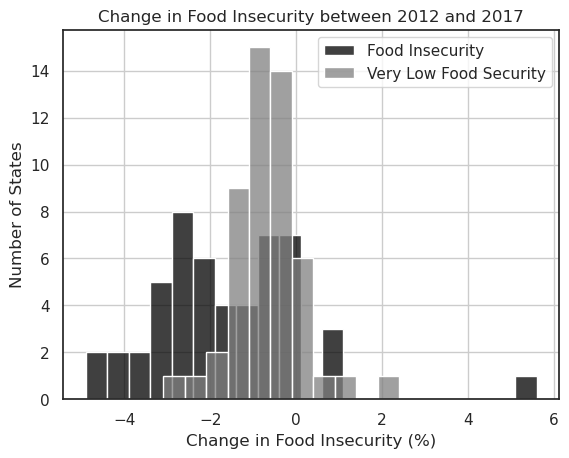

In [34]:
#Plot a histogram of the change in food insecurity and very low food security
sns.histplot(data=insecurity_change_df, x = "CH_FOODINSEC_14_17", binwidth = 0.5, color = "black")
sns.histplot(data=insecurity_change_df, x = "CH_VLFOODSEC_14_17", binwidth = 0.5, color = "grey")
plt.grid()
plt.title("Change in Food Insecurity between 2012 and 2017")
plt.legend(labels = ['Food Insecurity', 'Very Low Food Security'])
plt.ylabel('Number of States')
plt.xlabel('Change in Food Insecurity (%)')

In [8]:
#grouping by State because all county values within each state are the same
insecurity_change = FoodAtlas_Insecurity[["State", "CH_FOODINSEC_14_17"]]
insecurity_change_grouped = insecurity_change.groupby("State").mean()
insecurity_change_grouped.head()

,CH_FOODINSEC_14_17
State,
AK,-0.4
AL,-0.5
AR,-2.3
AZ,-2.5
CA,-2.3


In [9]:
#finding the states where food insecurity increased between 2012-2017
insecurity_change.loc[insecurity_change['CH_FOODINSEC_14_17'] > 0].groupby("State").mean()

,CH_FOODINSEC_14_17
State,
ME,0.6
NV,0.6
NY,5.6
PA,0.8


In [10]:
#finding the states where very low food security increased between 2012-2017
vl_insecurity_change = FoodAtlas_Insecurity[["State", "CH_VLFOODSEC_14_17"]]
vl_insecurity_change.loc[vl_insecurity_change['CH_VLFOODSEC_14_17'] > 0].groupby("State").mean()

,CH_VLFOODSEC_14_17
State,
IN,0.3
NV,0.6
NY,2.0
RI,0.9
VT,0.1
WI,0.3


In [18]:
#Dropping all columns except Food insecurity for 2012-2017
FoodAtlas_Insecurity_Low = FoodAtlas_Insecurity.drop(['FIPS','VLFOODSEC_12_14', 'VLFOODSEC_15_17', 'CH_VLFOODSEC_14_17','CH_FOODINSEC_14_17'] , axis = 1)
FoodAtlas_Insecurity_Low

,State,County,FOODINSEC_12_14,FOODINSEC_15_17
0,AL,Autauga,16.8,16.3
1,AL,Baldwin,16.8,16.3
2,AL,Barbour,16.8,16.3
3,AL,Bibb,16.8,16.3
4,AL,Blount,16.8,16.3
...,...,...,...,...
3138,WY,Sweetwater,14.0,13.2
3139,WY,Teton,14.0,13.2
3140,WY,Uinta,14.0,13.2
3141,WY,Washakie,14.0,13.2


In [24]:
#Top 5 states with food insecurity in 2012-2014
FoodAtlas_Insecurity_Top = FoodAtlas_Insecurity_Low.groupby('State', as_index=True).mean().sort_values(by = 'FOODINSEC_12_14', ascending = False)
FoodAtlas_Insecurity_Top = FoodAtlas_Insecurity_Top.drop(['FOODINSEC_15_17'], axis = 1)
FoodAtlas_Insecurity_Top.columns = ['Food Insecurity between 2012-2014']
FoodAtlas_Insecurity_Top.head()


,Food Insecurity between 2012-2014
State,
MO,22.0
AZ,19.9
LA,17.6
KY,17.5
TX,17.2


In [25]:
#Bottom 5 states with food insecurity in 2012-2014
FoodAtlas_Insecurity_Top = FoodAtlas_Insecurity_Low.groupby('State', as_index=True).mean().sort_values(by = 'FOODINSEC_12_14', ascending = True)
FoodAtlas_Insecurity_Top = FoodAtlas_Insecurity_Top.drop(['FOODINSEC_15_17'], axis = 1)
FoodAtlas_Insecurity_Top.columns = ['Food Insecurity between 2012-2014']
FoodAtlas_Insecurity_Top.head()


,Food Insecurity between 2012-2014
State,
NV,8.4
ME,9.6
NJ,10.0
VT,10.1
MN,10.4


In [26]:
#Top 5 states with food insecurity in 2015-2017
FoodAtlas_Insecurity_Top = FoodAtlas_Insecurity_Low.groupby('State', as_index=True).mean().sort_values(by = 'FOODINSEC_15_17', ascending = False)
FoodAtlas_Insecurity_Top = FoodAtlas_Insecurity_Top.drop(['FOODINSEC_12_14'], axis = 1)
FoodAtlas_Insecurity_Top.columns = ['Food Insecurity between 2015-2017']
FoodAtlas_Insecurity_Top.head()

,Food Insecurity between 2015-2017
State,
NY,17.9
AZ,17.4
LA,17.3
MO,17.2
AL,16.3


In [27]:
#Bottom 5 states with food insecurity in 2015-2017
FoodAtlas_Insecurity_Top = FoodAtlas_Insecurity_Low.groupby('State', as_index=True).mean().sort_values(by = 'FOODINSEC_15_17', ascending = True)
FoodAtlas_Insecurity_Top = FoodAtlas_Insecurity_Top.drop(['FOODINSEC_12_14'], axis = 1)
FoodAtlas_Insecurity_Top.columns = ['Food Insecurity between 2015-2017']
FoodAtlas_Insecurity_Top.head()

,Food Insecurity between 2015-2017
State,
HI,7.4
NM,8.6
NV,9.0
CO,9.2
NJ,9.4


In [24]:
FoodAtlas_Insecurity2 = FoodAtlas_Insecurity_Low.groupby('State', as_index=True).mean()
#Transposing the dataframe so I can plot the change in food insecurity
FoodAtlas_Insecurity2 = FoodAtlas_Insecurity2.T
FoodAtlas_Insecurity2

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
FOODINSEC_12_14,12.0,16.8,15.4,19.9,13.5,13.6,13.9,12.1,13.2,13.8,...,11.9,16.3,17.2,13.3,12.6,10.1,13.7,15.3,11.4,14.0
FOODINSEC_15_17,11.6,16.3,13.1,17.4,11.2,9.2,12.2,11.1,11.2,11.9,...,11.4,12.9,14.0,10.7,9.8,10.1,10.8,14.9,10.0,13.2


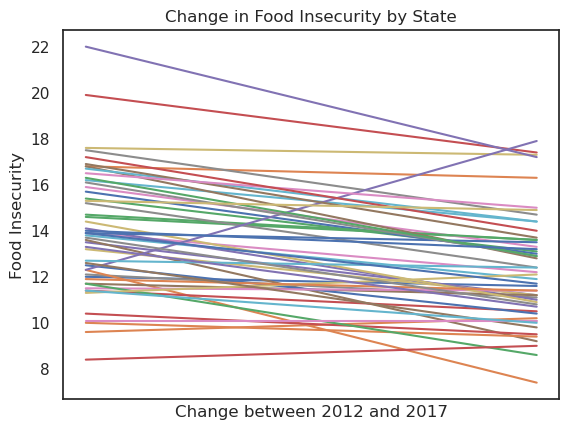

In [30]:
#Plot the change in food insecurity for all 50 states
for each in FoodAtlas_Insecurity2.columns:
    FoodAtlas_Insecurity2[each].plot()


plt.ylabel('Food Insecurity')
plt.xlabel('Change between 2012 and 2017')
plt.title('Change in Food Insecurity by State')
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.show()


In [16]:
#dropping all columns except Very Low Food Security for 2012-2017
FoodAtlas_Insecurity_VeryLow =  FoodAtlas_Insecurity.drop(['FIPS','FOODINSEC_12_14', 'FOODINSEC_15_17', 'CH_VLFOODSEC_14_17','CH_FOODINSEC_14_17'] , axis = 1)
FoodAtlas_Insecurity_VeryLow

,State,County,VLFOODSEC_12_14,VLFOODSEC_15_17
0,AL,Autauga,7.2,7.1
1,AL,Baldwin,7.2,7.1
2,AL,Barbour,7.2,7.1
3,AL,Bibb,7.2,7.1
4,AL,Blount,7.2,7.1
...,...,...,...,...
3138,WY,Sweetwater,5.3,5.1
3139,WY,Teton,5.3,5.1
3140,WY,Uinta,5.3,5.1
3141,WY,Washakie,5.3,5.1


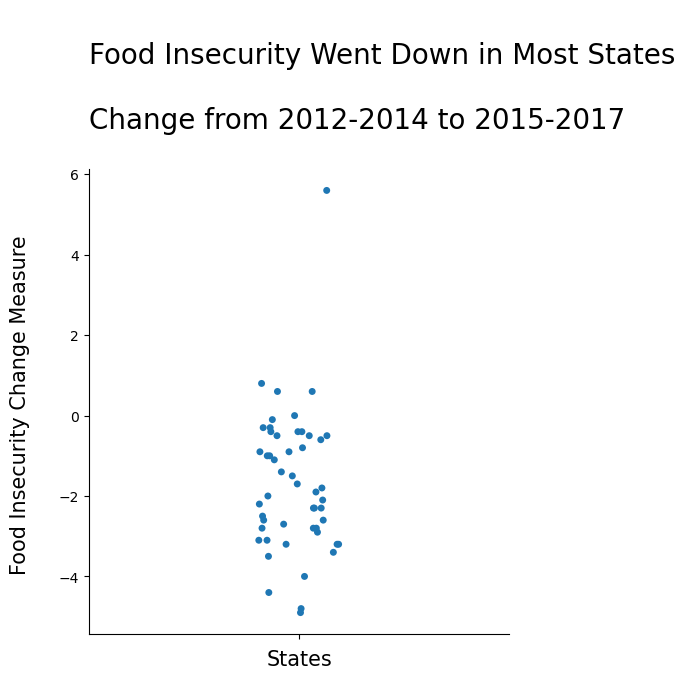

In [17]:
sns.catplot(
    data=insecurity_change_grouped,  y="CH_FOODINSEC_14_17"
)
plt.title('\nFood Insecurity Went Down in Most States \n\nChange from 2012-2014 to 2015-2017 \n', 
          loc = 'left', fontsize = 20)
plt.xlabel('States', fontsize = 15)
plt.ylabel('Food Insecurity Change Measure \n', fontsize = 15)
sns.set_theme(style='white')

In [18]:
insecurity_change_grouped.CH_FOODINSEC_14_17.max()

5.599999999999998

In [19]:
insecurity_change_grouped.CH_FOODINSEC_14_17.idxmax()

'NY'

In [20]:
insecurity_change_grouped.CH_FOODINSEC_14_17.min()

-4.9

In [21]:
insecurity_change_grouped.CH_FOODINSEC_14_17.idxmin()

'HI'